In [3]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils
from scipy.stats import skew, kurtosis
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import keras
from keras import layers
from keras import ops

In [14]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test, dtype=int)  # Ensure predictions are integers

        for i in range(num_test):
            # Get the indices of the k smallest distances
            sorted_dist = np.argsort(dists[i])
            
            # Extract the labels of the k nearest neighbors
            closest_y = self.y_train[sorted_dist[:k]].flatten()  # Ensure it's a 1D array

            # Debug: Print the closest labels
            print(f"Sample {i}: Closest labels: {closest_y}")

            # Predict the label using majority voting
            y_pred[i] = np.argmax(np.bincount(closest_y.astype(int)))

        return y_pred




In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


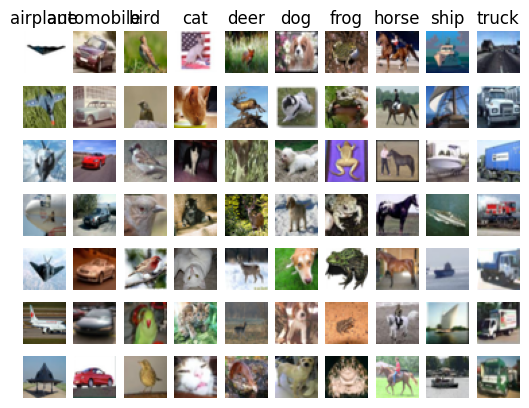

In [5]:
#Visualizing dataset samples
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
# Memory error prevention by subsampling data

num_training = 10000
mask = list(range(num_training))
x_train = x_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
x_test = x_test[mask]
y_test = y_test[mask]

In [9]:
# reshaping data and placing into rows
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print(x_train.shape, x_test.shape)

(10000, 3072) (1000, 3072)


In [ ]:
classifier = KNearestNeighbor()
classifier.train(x_train, y_train)
dists = classifier.compute_distances(x_test)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

Sample 0: Closest labels: [[2]
 [0]
 [0]
 [0]
 [0]]


ValueError: object too deep for desired array